In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rcParams  ## run command settings for plotting
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D  

config = {
    "mathtext.fontset":'stix',
    "font.family":'serif',
    "font.serif": ['SimHei'],
    "font.size": 10,   # 字号，大家自行调节
    'axes.unicode_minus': False # 处理负号，即-号
}
rcParams.update(config)  ## 设置画图的一些参数

## 读取数据
path = r"C:\Users\SUNHONGYU\猪皮套\ex2data1.txt"#加r标志为字符串
data = pd.read_csv(path) ## data 是dataframe 的数据类型

In [2]:
#打印三维坐标系
def show3D(x,y,z,title):
    # 创建一个新的图形  
    fig = plt.figure()  
  
    # 创建一个3D坐标轴的Axes对象  
    ax = fig.add_subplot(111, projection='3d')  

    # 绘制三维散点图  
    ax.scatter(x, y, z, c='red', marker='o')  

    # 设置坐标轴标签  
    ax.set_xlabel('特征1')  
    ax.set_ylabel('特征2')  
    ax.set_zlabel('标签')  

    # 设置标题  
    ax.set_title(title)  

    # 显示图形  
    plt.show()

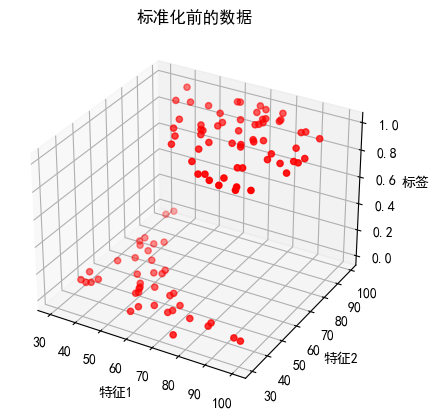

In [3]:
x=data['特征1'].values
y=data['特征2'].values
z=data['标签'].values

show3D(x,y,z,'标准化前的数据')

In [4]:
X_data = data.iloc[:,0:2]
y_data = data.iloc[:,2:3]

# 数据分割

In [21]:
#hold out
from sklearn.model_selection import train_test_split  
  
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

# 数据标准化

In [6]:
mean1=X_train['特征1'].mean()
std1=X_train['特征1'].std()
mean2=X_train['特征2'].mean()
std2=X_train['特征2'].std()

X_train['特征1']=(X_train['特征1']-mean1)/std1
X_test['特征1']=(X_test['特征1']-mean1)/std1
X_train['特征2']=(X_train['特征2']-mean2)/std2
X_test['特征2']=(X_test['特征2']-mean2)/std2

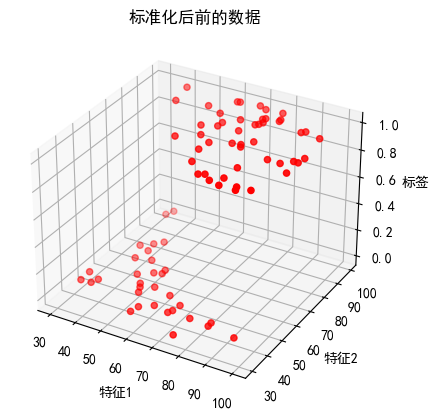

In [22]:
#数据
t=X_train.copy()
t['标签']=y_train

x=t['特征1'].values
y=t['特征2'].values
z=t['标签'].values
show3D(x,y,z,'标准化后前的数据')

In [23]:
#插入b
X_train.insert(0, 'Ones', 1)
X_test.insert(0, 'Ones', 1)

# sigmoid函数

In [9]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

# loss函数

In [10]:
def computeCost(X,Y,W):
    P=sigmoid(X@W)
    loss = np.sum(-Y*np.log(P)-(1-Y)*np.log(1-P))/X.shape[1]
    return loss,P

# 梯度下降

In [11]:
def gradientDecent(W,X,Y,alpha):
    error=sigmoid(X@W)-Y
    grad=X.T@error/X.shape[0]
    W-=alpha*grad
    return W

# 逻辑回归

In [12]:
def logisticRegression(X,Y,alpha,iters):
    feature_dim=X.shape[1]
    W=np.zeros((feature_dim,1))
    loss_his=[]
    W_his=[]
    
    for i in range(iters):
        loss,P=computeCost(X,Y,W)
        loss_his.append(loss)
        
        W=gradientDecent(W,X,Y,alpha)
        t=W.copy()
        W_his.append(t)
        
    return loss_his,W_his

# 预测函数

In [13]:
def predict(W,X):
    probability = sigmoid(X@W)
    y_hat=probability>=0.5
    return probability,y_hat

# 训练

In [14]:
alpha =0.001
iters=1000000

X=X_train.values
Y=y_train.values
loss_his_train,W_his=logisticRegression(X,Y,alpha,iters)

# 测试

In [15]:
def evaluate(X,Y,W):
    recall_his=[]
    precision_his=[]
    f1_score_his=[]
    fpr_his=[]
    y_hat_his=[]
    probability,y_hat=predict(W,X)
    p=[]
    for i in range(len(probability)):
        p.append(probability[i][0])
    p.sort()
    for a in p:
        tp=0
        fp=0
        tn=0
        fn=0
        for i in range(len(p)):
            if(Y[i]==1 and p[i]>=a):
                tp+=1
            elif(Y[i]==1 and p[i]<a):
                fn+=1
            elif(Y[i]==0 and p[i]>=a):
                fp+=1
            else:
                tn+=1
        recall=(float)(tp)/(tp+fn)
        recall_his.append(recall)
        precision=(float)(tp)/(tp+fp)
        precision_his.append(precision)
        fpr=(float)(fp)/(fp+tn)
        fpr_his.append(fpr)
        f1_score=(float)(2*precision*recall)/(precision+recall)
        f1_score_his.append(f1_score)
    showpr(recall_his,precision_his)
    showf1_score(f1_score_his,len(p))
    showroc(fpr_his,recall_his)
    print("AUC="+str(auc(fpr_his,recall_his)))

In [16]:
#绘制pr曲线
def showpr(recall_his,precision_his):
    plt.figure(figsize = (5,5))
    plt.title('PR_curve',fontsize=16)
    plt.plot(recall_his,precision_his)
    #plt.plot(recall_his,precision_his,'ro')
    plt.ylabel('Precision',fontsize = 16)
    plt.xlabel('Recall',fontsize = 16)
    
#绘制f1_score变化图像
def showf1_score(f1_score_his,iters):
    plt.figure(figsize = (5,5))
    plt.title('f1_score变化图像',fontsize=16)
    plt.plot(np.arange(iters),f1_score_his)
    plt.ylabel('f1_score',fontsize = 16)
    plt.xlabel('迭代次数',fontsize = 16)

#绘制roc曲线
def showroc(fpr_his,recall_his):
    plt.figure(figsize = (5,5))
    plt.title('ROC_curve',fontsize=16)
    plt.plot(fpr_his,recall_his)
    #plt.plot(fpr_his,recall_his,'ro')
    plt.ylabel('recall',fontsize = 16)
    plt.xlabel('fpr',fontsize = 16)
    
#计算AUC
def auc(fpr,tpr):
    auc=0
    lenn=len(fpr)
    for i in range(lenn-1):
        auc+=(fpr[i]-fpr[i+1])*(tpr[i+1]+tpr[i])
    return auc/2.0

AUC=0.42838541666666663


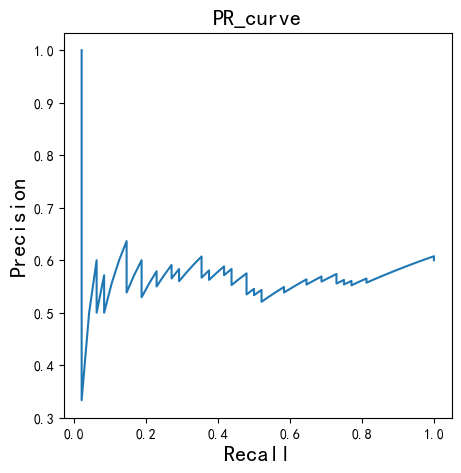

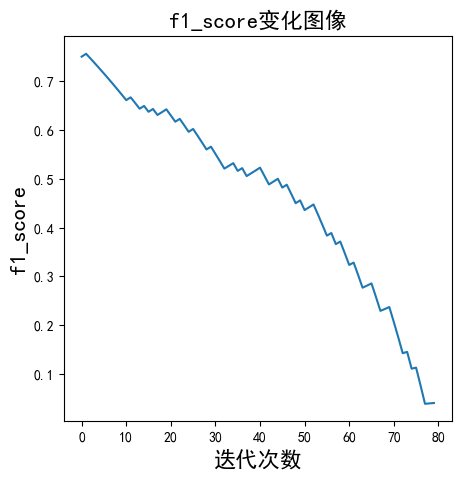

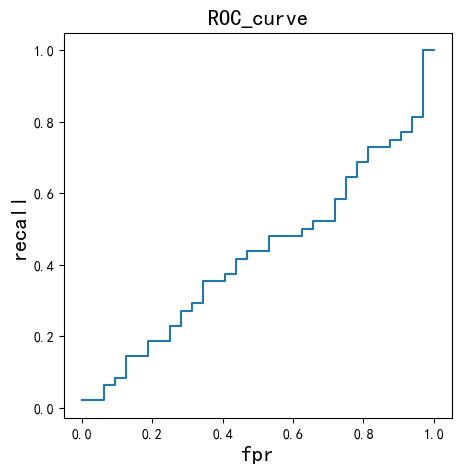

In [17]:
#train_set
X=X_train.values
Y=y_train.values
evaluate(X,Y,W_his[-1])

AUC=0.8958333333333333


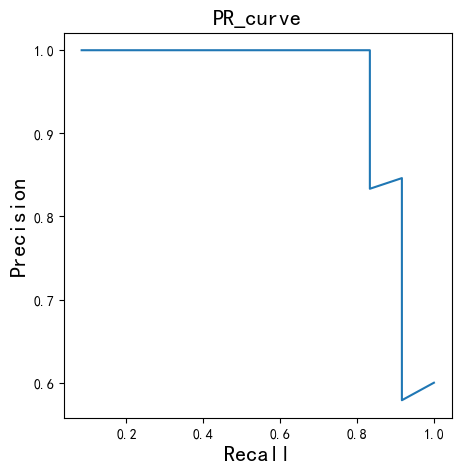

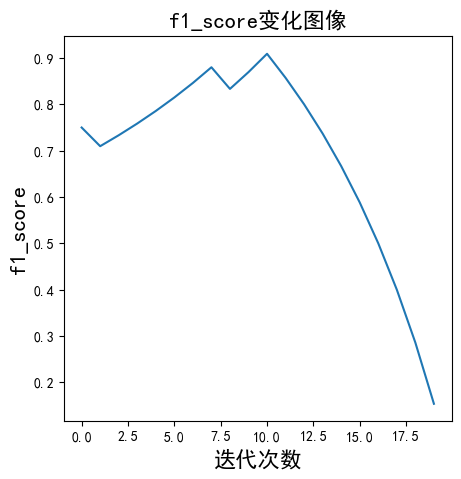

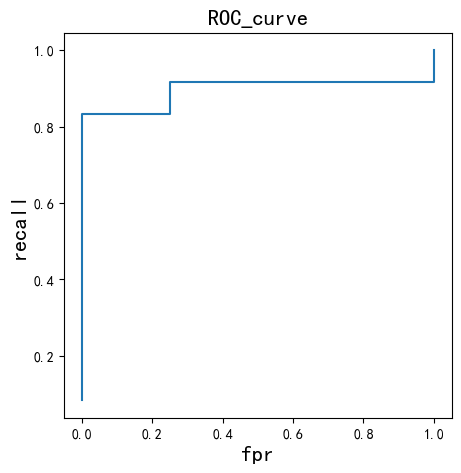

In [18]:
#test set
X=X_test.values
Y=y_test.values
evaluate(X,Y,W_his[-1])

# loss变化

In [19]:
#利用train_set迭代的W算出在test_set的loss
loss_his_test=[]
X=X_test.values
Y=y_test.values
for i in range (iters):
    loss,p = computeCost(X,Y,W_his[i])
    loss_his_test.append(loss)

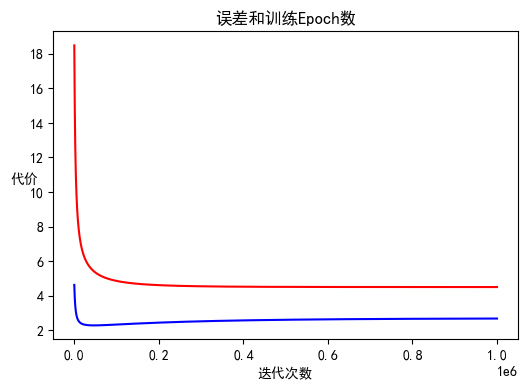

In [20]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(np.arange(iters), loss_his_train, 'r')
ax.plot(np.arange(iters), loss_his_test, 'b')
ax.set_xlabel('迭代次数')
ax.set_ylabel('代价', rotation=0)
ax.set_title('误差和训练Epoch数')
plt.show()